# What do Australians think of Donald Trump and the use of tariffs on Mastodon?

<p align="center">
  <img src="https://www.bu.edu/files/2024/07/donald-trump-political-violence-qa_feat.jpg" width="325" height="200"/>
  <img src="https://cdn.prod.website-files.com/630b302c741fe7a987396dd0/67a2593507271f23b2cfc425_trump-tariff-impact.webp" width="325" height="200"/>
</p>

In [49]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  


## 1. Data retrieval function

Define a function to fetch data from the API for different time periods.

In [50]:
def get_mastodon_data(start_date, end_date, keyword="trump"):
    """fetch data from Mastodon API"""
    url = "http://localhost:9090/analysis/range"
    
    headers = {
        "X-Fission-Params-Source": "mastodon-posts",
        "X-Fission-Params-Start": start_date,
        "X-Fission-Params-End": end_date,
        "X-Fission-Params-Keyword": keyword
    }
    
    try:
        response = requests.get(url, headers=headers)
        data = response.json()
        df = pd.DataFrame(data)
        print(f"Successfully retrieved data from {start_date} to {end_date}, with a total of {len(df)} records.")
        return df
    except Exception as e:
        print(f"Error occurred while retrieving data: {e}")
        return pd.DataFrame()

## 2. Retrieve data for the entire period

In [51]:
# fetch overall data from April to May 2025
df_overall = get_mastodon_data("2025-03-31", "2025-05-17", "trump")
df_overall

Successfully retrieved data from 2025-03-31 to 2025-05-17, with a total of 8 records.


,avg_sentiment,count,keyword
0,-0.097,135248,trump
1,-0.081,11100,donald trump
2,-0.043,461,trumpism
3,-0.161,443,maga
4,-0.162,156,trumpian
5,0.459,54,make america great again
6,-0.026,53,potus
7,-0.947,1,45th president


## 3. Fetch data for different time periods.

Divide the entire time range into several periods to analyze trend changes.

In [52]:
# Define the time periods.
time_periods = [
    ("2025-03-31", "2025-04-02"),
    ("2025-04-03", "2025-04-05"),
    ("2025-04-06", "2025-04-08"),
    ("2025-04-09", "2025-04-11"),
    ("2025-04-12", "2025-04-14"),
    ("2025-04-15", "2025-04-17"),
    ("2025-04-18", "2025-04-20"),
    ("2025-04-21", "2025-04-23"),
    ("2025-04-24", "2025-04-26"),
    ("2025-04-27", "2025-04-29"),
    ("2025-04-30", "2025-05-02"),
    ("2025-05-03", "2025-05-05"),
    ("2025-05-06", "2025-05-08"),
    ("2025-05-09", "2025-05-11"),
    ("2025-05-12", "2025-05-14"),
    ("2025-05-15", "2025-05-17")
]

# Create a dictionary to store data for each period.
period_data = {}

for start, end in time_periods:
    period_name = f"{start} to {end}"
    period_data[period_name] = get_mastodon_data(start, end, "trump")

Successfully retrieved data from 2025-03-31 to 2025-04-02, with a total of 1 records.
Successfully retrieved data from 2025-04-03 to 2025-04-05, with a total of 2 records.
Successfully retrieved data from 2025-04-06 to 2025-04-08, with a total of 5 records.
Successfully retrieved data from 2025-04-09 to 2025-04-11, with a total of 5 records.
Successfully retrieved data from 2025-04-12 to 2025-04-14, with a total of 6 records.
Successfully retrieved data from 2025-04-15 to 2025-04-17, with a total of 5 records.
Successfully retrieved data from 2025-04-18 to 2025-04-20, with a total of 5 records.
Successfully retrieved data from 2025-04-21 to 2025-04-23, with a total of 5 records.
Successfully retrieved data from 2025-04-24 to 2025-04-26, with a total of 5 records.
Successfully retrieved data from 2025-04-27 to 2025-04-29, with a total of 5 records.
Successfully retrieved data from 2025-04-30 to 2025-05-02, with a total of 5 records.
Successfully retrieved data from 2025-05-03 to 2025-05

## 4. Analysis 1: Changes in the number of posts over time

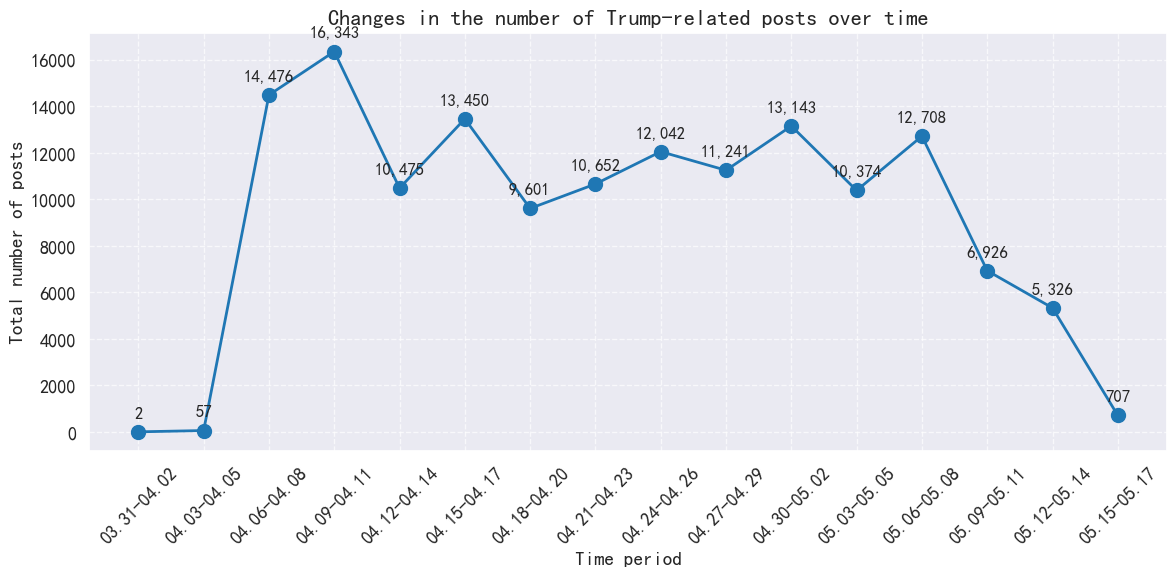

In [53]:
# Extract the total number of posts for each time period
total_posts = []
period_labels = []

for period, df in period_data.items():
    total_posts.append(df['count'].sum())
    # Simplify the labels to display only the month and day
    start, end = period.split(' to ')
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')
    period_labels.append(f"{start_date.strftime('%m.%d')}-{end_date.strftime('%m.%d')}")

# Create a chart showing the change in post count over time
plt.figure(figsize=(12, 6))
plt.plot(period_labels, total_posts, marker='o', linewidth=2, markersize=10, color='#1f77b4')
plt.title('Changes in the number of Trump-related posts over time', fontsize=16)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Total number of posts', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Label each data point with its exact value
for i, count in enumerate(total_posts):
    plt.annotate(f"{count:,}", (i, count), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## 5. Analysis 2: Changes in sentiment scores over time

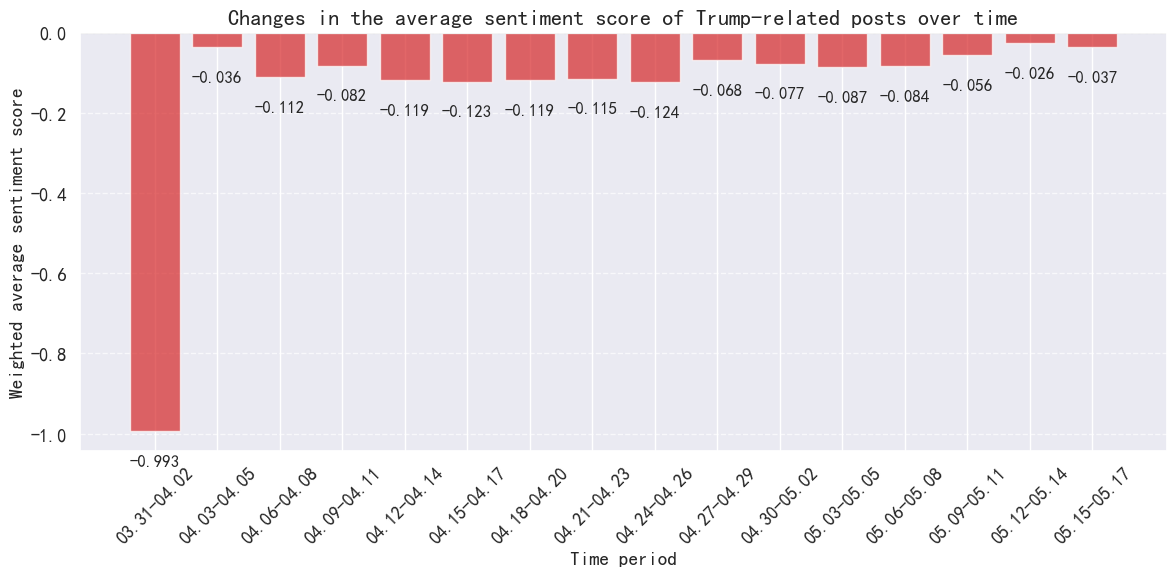

In [54]:
# Calculate the weighted average sentiment score for each time period
weighted_sentiment = []

for period, df in period_data.items():
    # Compute the weighted average sentiment score (weighted by post count)
    total_count = df['count'].sum()
    if total_count > 0:
        avg_sentiment = sum(df['avg_sentiment'] * df['count']) / total_count
    else:
        avg_sentiment = 0
    weighted_sentiment.append(avg_sentiment)

# Create a chart showing the change in sentiment scores over time
plt.figure(figsize=(12, 6))

# Create a color mapping: red for negative sentiment, green for positive sentiment
colors = ['#d62728' if s < 0 else '#2ca02c' for s in weighted_sentiment]

plt.bar(period_labels, weighted_sentiment, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Changes in the average sentiment score of Trump-related posts over time', fontsize=16)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Weighted average sentiment score', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Label each bar in the chart with its exact value
for i, score in enumerate(weighted_sentiment):
    plt.annotate(f"{score:.3f}", (i, score), textcoords="offset points", 
                 xytext=(0, 10 if score >= 0 else -25), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## 6. Analysis 3: Changes in keyword distribution over time

In [55]:
# Retrieve all keywords that appear across all time periods
all_keywords = set()
for df in period_data.values():
    all_keywords.update(df['keyword'].tolist())

# Select the top 5 most frequently occurring keywords (excluding the main keyword "trump")
keyword_counts = {}
for keyword in all_keywords:
    if keyword.lower() != "trump":  # Exclude the main keyword
        total = 0
        for df in period_data.values():
            if keyword in df['keyword'].values:
                total += df.loc[df['keyword'] == keyword, 'count'].values[0]
        keyword_counts[keyword] = total

# Retrieve the top 5 keywords
top_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:5]
top_keywords = [k for k, v in top_keywords]
print(f"Top 5 most frequently occurring related keywords: {', '.join(top_keywords)}")

# Create a DataFrame to store the post count for each keyword in each time period
keyword_data = []

for period, df in period_data.items():
    period_dict = {'period': period}
    
    # Include the main keyword "trump"
    if "trump" in df['keyword'].values:
        period_dict["trump"] = df.loc[df['keyword'] == "trump", 'count'].values[0]
    else:
        period_dict["trump"] = 0
    
    # Include the other selected keywords
    for keyword in top_keywords:
        if keyword in df['keyword'].values:
            period_dict[keyword] = df.loc[df['keyword'] == keyword, 'count'].values[0]
        else:
            period_dict[keyword] = 0
            
    keyword_data.append(period_dict)

keyword_df = pd.DataFrame(keyword_data)
keyword_df['period_label'] = period_labels
keyword_df

Top 5 most frequently occurring related keywords: donald trump, trumpism, maga, trumpian, make america great again


,period,trump,donald trump,trumpism,maga,trumpian,make america great again,period_label
0,2025-03-31 to 2025-04-02,2,0,0,0,0,0,03.31-04.02
1,2025-04-03 to 2025-04-05,56,1,0,0,0,0,04.03-04.05
2,2025-04-06 to 2025-04-08,13276,1133,43,0,14,10,04.06-04.08
3,2025-04-09 to 2025-04-11,15093,1196,30,0,12,12,04.09-04.11
4,2025-04-12 to 2025-04-14,9627,808,29,0,5,5,04.12-04.14
5,2025-04-15 to 2025-04-17,12492,908,32,0,10,8,04.15-04.17
6,2025-04-18 to 2025-04-20,8913,638,40,0,8,2,04.18-04.20
7,2025-04-21 to 2025-04-23,9832,784,23,0,12,1,04.21-04.23
8,2025-04-24 to 2025-04-26,11053,955,25,0,6,3,04.24-04.26
9,2025-04-27 to 2025-04-29,10263,933,28,0,16,1,04.27-04.29


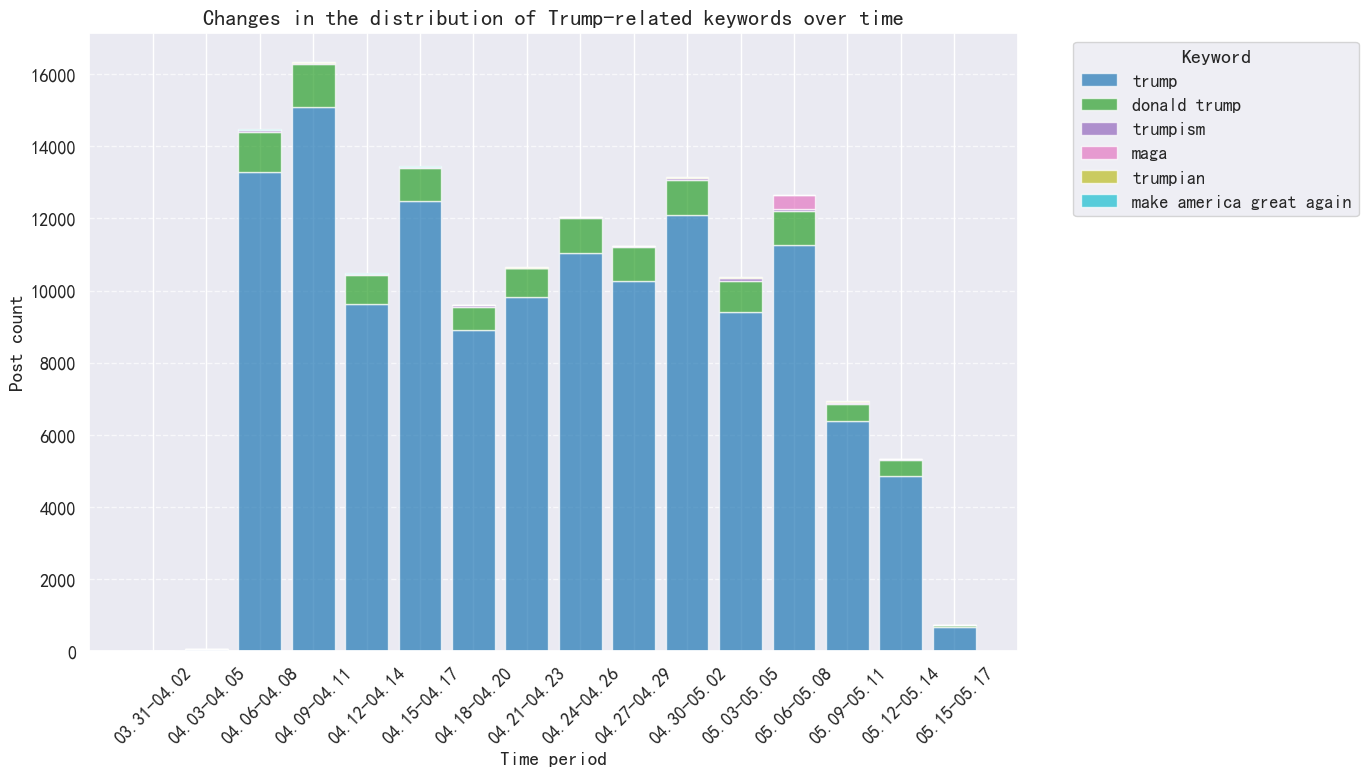

In [56]:
# Plot a stacked bar chart to show the change in keyword distribution over time
plt.figure(figsize=(14, 8))

# Set colors
colors = plt.cm.tab10(np.linspace(0, 1, len(top_keywords) + 1))

# Create the stacked bar chart
bottom = np.zeros(len(period_labels))

# First plot the main keyword "trump"
plt.bar(period_labels, keyword_df["trump"], label="trump", color=colors[0], alpha=0.7)
bottom += keyword_df["trump"].values

# Then plot the other keywords
for i, keyword in enumerate(top_keywords):
    plt.bar(period_labels, keyword_df[keyword], bottom=bottom, label=keyword, color=colors[i+1], alpha=0.7)
    bottom += keyword_df[keyword].values

plt.title('Changes in the distribution of Trump-related keywords over time', fontsize=16)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Post count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7. Analysis 4: Trend in keyword frequency over time

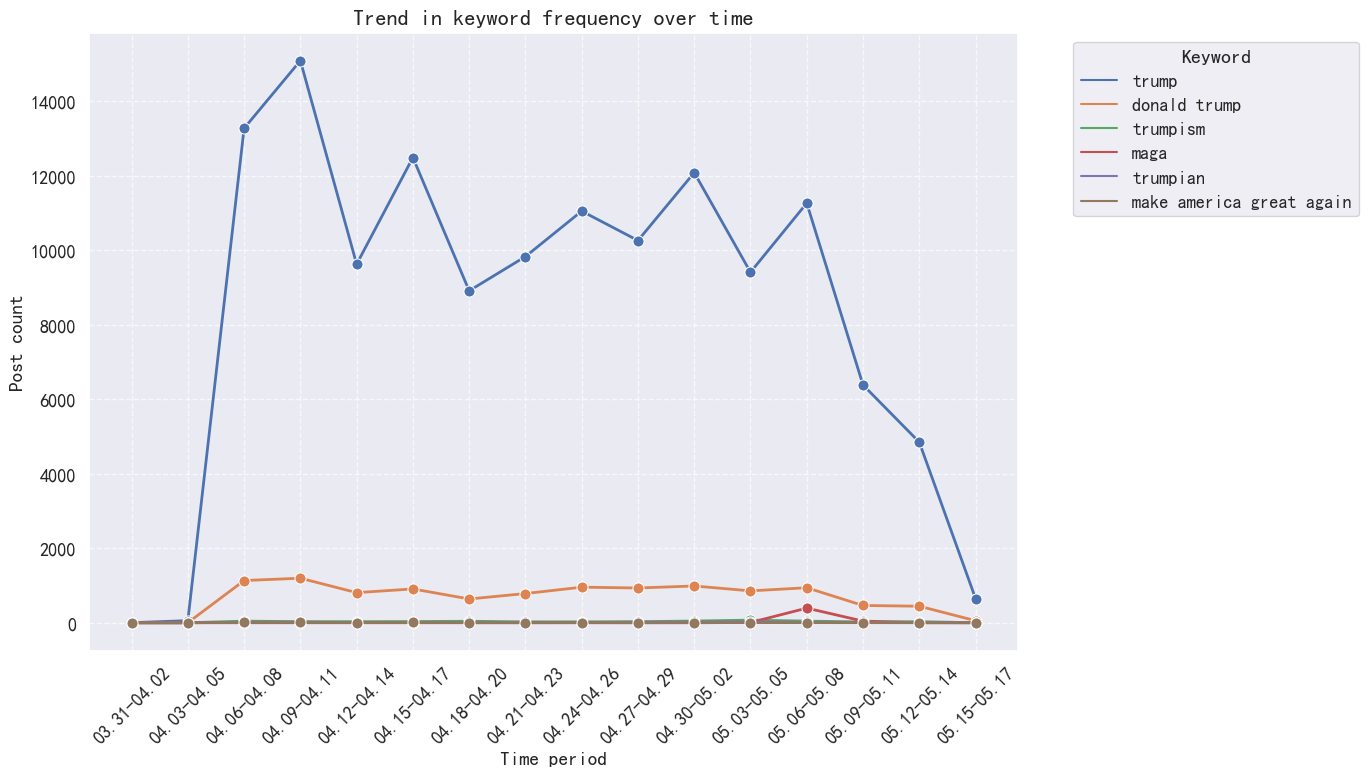

In [57]:
# Create a DataFrame containing all time periods and the top 5 keywords
trend_data = pd.DataFrame()
trend_data['period'] = period_labels

# Include the main keyword "trump"
trend_data['trump'] = keyword_df['trump'].values

# Include the other selected keywords
for keyword in top_keywords:
    trend_data[keyword] = keyword_df[keyword].values

# Convert the data to long format for easier plotting with seaborn
trend_data_long = pd.melt(trend_data, id_vars=['period'], var_name='keyword', value_name='count')

# Plot the trend in keyword frequency over time
plt.figure(figsize=(14, 8))

# Use seaborn’s lineplot to draw the trend lines
sns.lineplot(data=trend_data_long, x='period', y='count', hue='keyword', marker='o', linewidth=2, markersize=8)

plt.title('Trend in keyword frequency over time', fontsize=16)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Post count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 8. Analysis 5: Changes in sentiment scores of keywords over time

In [58]:
# Create a DataFrame to store the sentiment score of each keyword in each time period
sentiment_data = []

for period, df in period_data.items():
    period_dict = {'period': period}
    
    # Include the main keyword "trump"
    if "trump" in df['keyword'].values:
        period_dict["trump"] = df.loc[df['keyword'] == "trump", 'avg_sentiment'].values[0]
    else:
        period_dict["trump"] = 0
    
    # Include the other selected keywords
    for keyword in top_keywords:
        if keyword in df['keyword'].values:
            period_dict[keyword] = df.loc[df['keyword'] == keyword, 'avg_sentiment'].values[0]
        else:
            period_dict[keyword] = 0
            
    sentiment_data.append(period_dict)

sentiment_df = pd.DataFrame(sentiment_data)
sentiment_df['period_label'] = period_labels
sentiment_df

,period,trump,donald trump,trumpism,maga,trumpian,make america great again,period_label
0,2025-03-31 to 2025-04-02,-0.993,0.000,0.000,0.000,0.000,0.000,03.31-04.02
1,2025-04-03 to 2025-04-05,-0.051,0.785,0.000,0.000,0.000,0.000,04.03-04.05
2,2025-04-06 to 2025-04-08,-0.112,-0.114,-0.059,0.000,-0.047,0.437,04.06-04.08
3,2025-04-09 to 2025-04-11,-0.085,-0.057,0.055,0.000,-0.097,0.274,04.09-04.11
4,2025-04-12 to 2025-04-14,-0.118,-0.133,-0.076,0.000,-0.219,0.655,04.12-04.14
5,2025-04-15 to 2025-04-17,-0.124,-0.113,-0.061,0.000,-0.267,0.511,04.15-04.17
6,2025-04-18 to 2025-04-20,-0.118,-0.143,-0.015,0.000,-0.160,0.782,04.18-04.20
7,2025-04-21 to 2025-04-23,-0.113,-0.144,-0.172,0.000,-0.074,-0.249,04.21-04.23
8,2025-04-24 to 2025-04-26,-0.126,-0.105,-0.136,0.000,-0.354,0.769,04.24-04.26
9,2025-04-27 to 2025-04-29,-0.072,-0.031,-0.035,0.000,-0.085,0.625,04.27-04.29


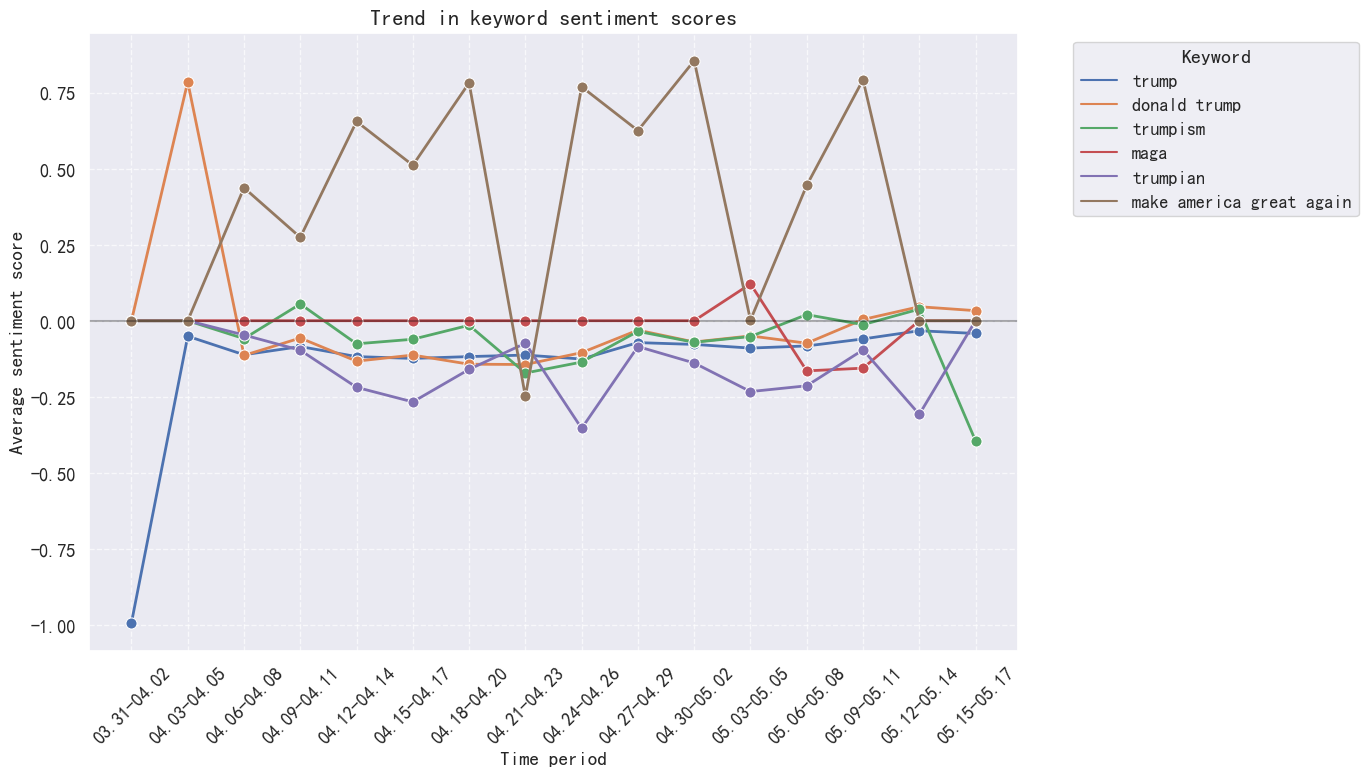

In [60]:
# Create a DataFrame containing all time periods and the sentiment scores of the keywords
sentiment_trend = pd.DataFrame()
sentiment_trend['period'] = period_labels

# Include the main keyword "trump"
sentiment_trend['trump'] = sentiment_df['trump'].values

# Include the other selected keywords
for keyword in top_keywords:
    sentiment_trend[keyword] = sentiment_df[keyword].values

# Convert the data to long format for easier plotting with seaborn
sentiment_trend_long = pd.melt(sentiment_trend, id_vars=['period'], var_name='keyword', value_name='sentiment')

# Plot the trend in keyword sentiment scores
plt.figure(figsize=(14, 8))

# Use seaborn’s lineplot to draw the trend lines
sns.lineplot(data=sentiment_trend_long, x='period', y='sentiment', hue='keyword', marker='o', linewidth=2, markersize=8)

plt.title('Trend in keyword sentiment scores', fontsize=16)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Average sentiment score', fontsize=14)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 9. Summary

Based on the above analyses, we can draw the following conclusions:

1. **Post Volume Changes**：By observing the trend of Trump-related post counts across different time periods, we can identify fluctuations in public attention at specific time points.

2. **Sentiment Score Changes**：The overall sentiment surrounding Trump-related topics varies across time periods, reflecting shifts in public mood.

3. **Keyword Distribution**：In addition to the main keyword "trump," the distribution and variation of other related keywords indicate shifts in discussion focus.

4. **Keyword Trends**：The popularity of certain keywords changes over time, revealing shifts in public interest.

5. **Sentiment Differences**: There are clear sentiment differences between keywords—some tend to trigger more positive or negative discussions.

6. **Sentiment Trends**：The change in sentiment scores of keywords over time reflects evolving public attitudes toward specific topics.